In [ ]:
!pip install torch torchvision numpy scikit-learn
!pip install -r req.txt


  Using cached antlr4_python3_runtime-4.13.2-py3-none-any.whl.metadata (304 bytes)
  Using cached argon2_cffi-20.1.0-cp35-abi3-manylinux1_x86_64.whl.metadata (7.9 kB)
  Using cached async_generator-1.10-py3-none-any.whl.metadata (4.9 kB)
  Using cached async_timeout-3.0.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached attrs-20.2.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached bleach-3.2.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached brotlipy-0.7.0-cp35-abi3-manylinux2010_x86_64.whl.metadata (2.9 kB)
  Using cached cachetools-4.1.1-py3-none-any.whl.metadata (4.4 kB)
  Using cached certifi-2020.11.8-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached cffi-1.14.3.tar.gz (470 kB)
  Preparing metadata (setup.py) ... done
  Using cached chardet-3.0.4-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached click-7.1.2-py2.py3-none-any.whl.metadata (2.9 kB)
  Using cached cryptography-3.1.1-cp35-abi3-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached cycler-0.10.0-py2.

In [ ]:
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Load ADL data
data_path = '/content/drive/MyDrive/ssl-wearables-main/data/adl_30hz_clean'
X = np.load(f'{data_path}/X.npy')  # Load accelerometer data
Y = np.load(f'{data_path}/Y.npy')  # Load labels

# Print dimensions to inspect
print(X.shape, Y.shape)  # Expected shape: (635, 300, 3), (635,)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(635, 300, 3) (635,)


In [ ]:
#print(Y[0:634])
print(X[0:20])

[[[ 0.35714286  0.54761905  0.83333333]
  [ 0.31589425  0.5952381   0.72853958]
  [ 0.39202102  0.56338589  0.58249721]
  ...
  [-0.82059245  0.30952381  0.38565058]
  [-0.96663481  0.26508998  0.31589425]
  [-1.11904762  0.11904762  0.21428571]]

 [[ 0.30952381  0.26190476  0.69047619]
  [ 0.45238095  0.35395764  0.64285714]
  [ 0.45238095  0.29041249  0.63011626]
  ...
  [-0.75083612  0.2682752   0.06505813]
  [-0.78252907  0.30633859  0.1158624 ]
  [-0.73809524  0.26190476  0.11904762]]

 [[-0.88095238  0.64285714  0.11904762]
  [-0.87458194  0.54443383  0.02380952]
  [-0.77934384  0.5         0.02380952]
  ...
  [ 0.35077242  0.16029623  1.01743908]
  [ 0.35714286  0.07779901  0.9793757 ]
  [ 0.35714286  0.11904762  1.02380952]]

 ...

 [[-0.02380952  0.54761905  0.92857143]
  [ 0.02699474  0.54761905  0.88732282]
  [ 0.07779901  0.54124861  0.96982004]
  ...
  [-0.67773531  0.64285714  0.5       ]
  [-0.60160854  0.68729097  0.5       ]
  [-0.5952381   0.73809524  0.5       ]]

 [

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)  # Convert string labels to integers

# Split dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y_encoded, test_size=0.15, random_state=42)

# Print validation set shapes
print(X_val.shape, Y_val.shape)  # Check the shapes of validation data


(96, 300, 3) (96,)


In [ ]:
import torch

# Load the Harnet10 model
repo = 'OxWearables/ssl-wearables'
harnet10 = torch.hub.load(repo, 'harnet10', class_num=len(label_encoder.classes_), pretrained=True)

# Set the model to evaluation mode
harnet10.eval()


Using cache found in /root/.cache/torch/hub/OxWearables_ssl-wearables_main
/root/.cache/torch/hub/OxWearables_ssl-wearables_main/hubconf.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experim

131 Weights loaded


Resnet(
  (feature_extractor): Sequential(
    (layer1): Sequential(
      (0): Conv1d(3, 64, kernel_size=(5,), stride=(1,), padding=(2,), bias=False, padding_mode=circular)
      (1): ResBlock(
        (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,), bias=False, padding_mode=circular)
        (conv2): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,), bias=False, padding_mode=circular)
        (relu): ReLU(inplace=True)
      )
      (2): ResBlock(
        (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,), bias=False, padding_mode=circular)
        (conv2): Conv1d(6

In [ ]:
# Convert validation data to PyTorch tensors and reshape
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).permute(0, 2, 1)  # Shape should be (96, 3, 300)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.long)

# Check the shape after conversion
print("Shape of X_val_tensor:", X_val_tensor.shape)  # Expected: [96, 3, 300]


Shape of X_val_tensor: torch.Size([96, 3, 300])


In [ ]:
import torch.nn as nn

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Validation loop
with torch.no_grad():
    val_output = harnet10(X_val_tensor)  # Forward pass through the model
    val_loss = criterion(val_output, Y_val_tensor)  # Compute validation loss
    print(f"Validation Loss: {val_loss.item():.4f}")

    # Calculate accuracy
    _, predicted = torch.max(val_output.data, 1)
    total = Y_val_tensor.size(0)
    correct = (predicted == Y_val_tensor).sum().item()
    accuracy = (correct / total) * 100
    print(f'Validation Accuracy: {accuracy:.2f}%')


Validation Loss: 10.8334
Validation Accuracy: 10.42%


In [ ]:
# @title Evaluation with Transfer learning, Fine tuning, shuffling and multiple epochs
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Don't forget to import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score  # Import f1_score

# Define paths
data_path = '/content/drive/MyDrive/ssl-wearables-main/data/adl_30hz_clean'  # Update this path
X = np.load(f'{data_path}/X.npy')  # Load accelerometer data
Y = np.load(f'{data_path}/Y.npy')  # Load labels

# Encode labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
Y_tensor = torch.LongTensor(Y_encoded)

# Split the dataset into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_tensor, Y_tensor, test_size=0.2, random_state=42)

# Create DataLoader
train_dataset = TensorDataset(X_train, Y_train)
val_dataset = TensorDataset(X_val, Y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load the pre-trained model
repo = 'OxWearables/ssl-wearables'
model = torch.hub.load(repo, 'harnet10', pretrained=True)


# Replace the classifier with a new one for fine-tuning
num_classes = len(label_encoder.classes_)  # Automatically determine the number of classes

if hasattr(model, 'classifier'):
    # Access the first linear layer of the classifier
    in_features = model.classifier.linear1.in_features  # Get the input features of the first linear layer
    model.classifier = nn.Linear(in_features, num_classes)  # Create a new classifier layer
else:
    print("The model does not have a classifier attribute.")

# Set the model to training mode
model.train()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Initialize lists to store validation loss and accuracy
validation_losses = []
validation_accuracies = []
validation_f1_scores = []  # List to store F1 scores

# Training loop
num_epochs = 10  # Adjust the number of epochs as needed
for epoch in range(num_epochs):
    for batch_X, batch_Y in train_loader:
        # Ensure input shape is (batch_size, channels, sequence_length)
        batch_X = batch_X.permute(0, 2, 1)  # Adjust shape if necessary
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(batch_X)  # Forward pass
        loss = criterion(outputs, batch_Y)  # Compute loss
        loss.backward()  # Backward pass (backpropagation)
        optimizer.step()  # Update weights

    # Validation phase
    model.eval()  # Set to evaluation mode
    val_loss = 0
    val_accuracy = 0
    all_predictions = []  # List to store predictions for F1 score calculation
    all_labels = []  # List to store true labels for F1 score calculation
    with torch.no_grad():  # No gradients needed during validation
        for batch_X, batch_Y in val_loader:
            batch_X = batch_X.permute(0, 2, 1)  # Adjust shape if necessary
            outputs = model(batch_X)
            loss = criterion(outputs, batch_Y)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_accuracy += (predicted == batch_Y).sum().item()

            # Store predictions and labels
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(batch_Y.cpu().numpy())

    val_loss /= len(val_loader)
    val_accuracy /= len(val_dataset)

    # Calculate F1 score
    f1 = f1_score(all_labels, all_predictions, average='weighted')  # Use 'weighted' to handle class imbalance

    # Store validation loss, accuracy, and F1 score
    validation_losses.append(val_loss)
    validation_accuracies.append(val_accuracy)
    validation_f1_scores.append(f1)

    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, F1 Score: {f1:.4f}')

# Save the trained model
model_save_path = './trained_harnet10_model.pth'  # Specify the model save path
torch.save(model.state_dict(), model_save_path)
print(f'Model saved to {model_save_path}')


Using cache found in /root/.cache/torch/hub/OxWearables_ssl-wearables_main
/root/.cache/torch/hub/OxWearables_ssl-wearables_main/hubconf.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experim

131 Weights loaded
Epoch 1/10, Validation Loss: 0.6226, Validation Accuracy: 0.8189, F1 Score: 0.7917
Epoch 2/10, Validation Loss: 0.1657, Validation Accuracy: 0.9685, F1 Score: 0.9682
Epoch 3/10, Validation Loss: 0.1387, Validation Accuracy: 0.9685, F1 Score: 0.9693
Epoch 4/10, Validation Loss: 0.1247, Validation Accuracy: 0.9685, F1 Score: 0.9686
Epoch 5/10, Validation Loss: 0.1584, Validation Accuracy: 0.9685, F1 Score: 0.9686
Epoch 6/10, Validation Loss: 0.1745, Validation Accuracy: 0.9764, F1 Score: 0.9763
Epoch 7/10, Validation Loss: 0.1775, Validation Accuracy: 0.9764, F1 Score: 0.9763
Epoch 8/10, Validation Loss: 0.1782, Validation Accuracy: 0.9764, F1 Score: 0.9763
Epoch 9/10, Validation Loss: 0.1791, Validation Accuracy: 0.9764, F1 Score: 0.9763
Epoch 10/10, Validation Loss: 0.1817, Validation Accuracy: 0.9764, F1 Score: 0.9763
Model saved to ./trained_harnet10_model.pth



Validation Results:
   Epoch  Validation Loss  Validation Accuracy  F-1 Score
0      1         0.622550             0.818898   0.791721
1      2         0.165657             0.968504   0.968170
2      3         0.138723             0.968504   0.969312
3      4         0.124685             0.968504   0.968599
4      5         0.158450             0.968504   0.968599
5      6         0.174524             0.976378   0.976343
6      7         0.177521             0.976378   0.976343
7      8         0.178184             0.976378   0.976343
8      9         0.179146             0.976378   0.976343
9     10         0.181700             0.976378   0.976343


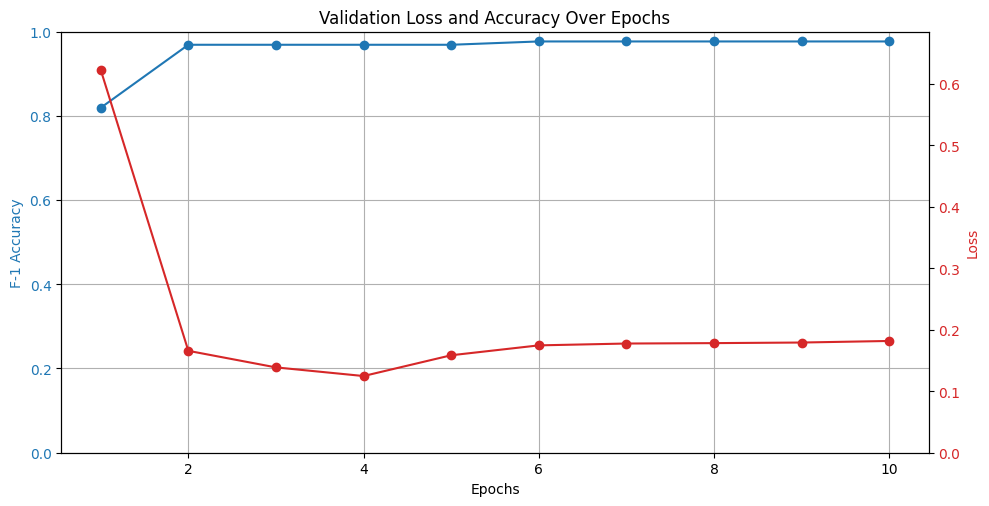

In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Epoch': list(range(1, num_epochs + 1)),
    'Validation Loss': validation_losses,
    'Validation Accuracy': validation_accuracies,
    'F-1 Score': validation_f1_scores
})

print("\nValidation Results:")
print(results_df)

epochs = list(range(1, num_epochs + 1))

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot F-1 accuracy
color = 'tab:blue'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('F-1 Accuracy', color=color)
ax1.plot(epochs, validation_accuracies, marker='o', color=color, label='F-1 Score')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1)  # Set y-axis limits to [0, 1]

# Create a second y-axis to plot validation loss
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loss', color=color)
ax2.plot(epochs, validation_losses, marker='o', color=color, label='Validation Loss')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, max(validation_losses) * 1.1)  # Set y-axis limits

# Adding grid and legends
ax1.grid()
fig.tight_layout()  # Adjust layout to prevent overlap
plt.title('Validation Loss and Accuracy Over Epochs')
plt.show()